In [2]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [3]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [4]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [5]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [6]:
df = pd.read_csv("vacation_preferences_data.csv")

In [7]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


In [8]:
df['Income category'] = df['Income'].apply(lambda x: 'low' if x<50000 else ('mid' if x < 90000 else 'high'))

In [9]:
#df = df.drop('Income', axis=1)

In [11]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1,mid
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0,mid
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1,low
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1,high
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0,high


In [12]:
label_encoder = LabelEncoder()

In [13]:
encoded_values = label_encoder.fit_transform(df["Income category"])

In [14]:
df["Income category"] = label_encoder.fit_transform(df["Income category"])


In [15]:
label_encoder.classes_

array(['high', 'low', 'mid'], dtype=object)

In [16]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
Income category              0
dtype: int64

<Axes: >

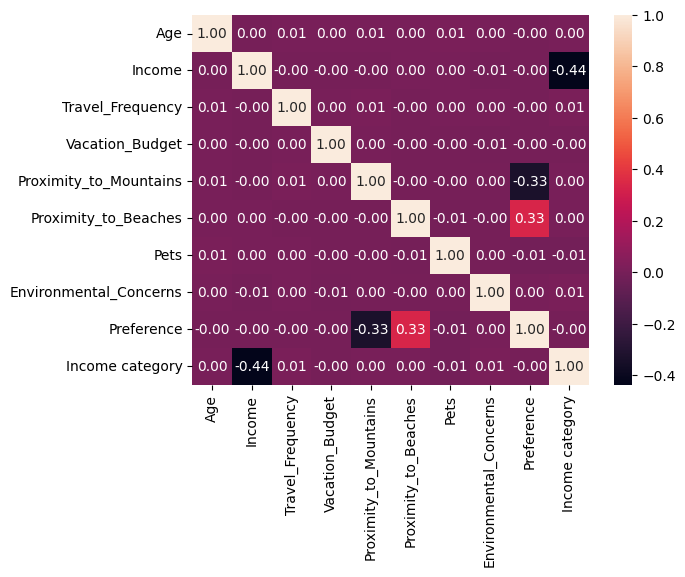

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")

<Axes: ylabel='Frequency'>

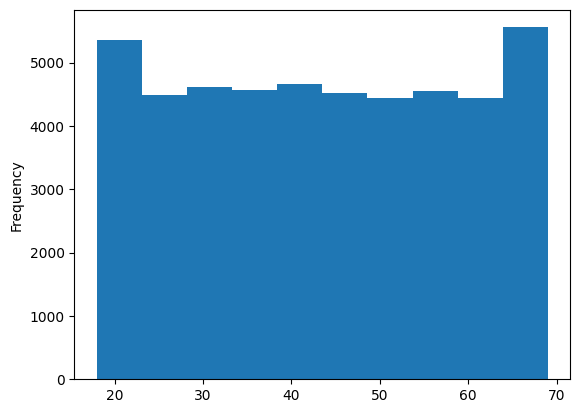

In [18]:
df["Age"].plot.hist()

In [19]:
ordinal_encoder = OrdinalEncoder(categories="auto")
encoded_values = ordinal_encoder.fit_transform(df[["Education_Level"]])

In [20]:
ordinal_encoder.categories_

[array(['bachelor', 'doctorate', 'high school', 'master', nan],
       dtype=object)]

In [21]:
df["Education_Level"] = encoded_values
df["Education_Level"].isnull().sum()

np.int64(2622)

In [22]:
knn_imputer = KNNImputer(n_neighbors=5)
df[['Education_Level']] = knn_imputer.fit_transform(df[['Education_Level']])

In [23]:
iterative_imputer = IterativeImputer()

In [24]:
imputed_data = iterative_imputer.fit_transform(df[["Age", "Proximity_to_Mountains"]])

In [25]:
df[["Age", "Proximity_to_Mountains"]] = imputed_data

In [26]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
Income category           0
dtype: int64

In [27]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category
0,56.0,male,71477,0.0,9,skiing,2477,urban,175.000000,267,summer,0,1,1,2
1,69.0,male,88740,3.0,1,swimming,4777,suburban,150.310508,190,fall,0,1,0,2
2,46.0,female,46562,3.0,0,skiing,1469,urban,71.000000,280,winter,0,0,1,1
3,32.0,non-binary,99044,2.0,6,hiking,1482,rural,31.000000,255,summer,1,0,1,0
4,60.0,female,106583,2.0,5,sunbathing,516,suburban,23.000000,151,winter,1,1,0,0


In [28]:
one_hot_encoded_values = pd.get_dummies(df["Gender"])

In [29]:
one_hot_encoded_values.head()

,female,male,non-binary
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False


In [30]:
df = pd.concat([df.drop(columns=["Gender"]), one_hot_encoded_values], axis=1)

In [31]:
df.head()

,Age,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category,female,male,non-binary
0,56.0,71477,0.0,9,skiing,2477,urban,175.000000,267,summer,0,1,1,2,False,True,False
1,69.0,88740,3.0,1,swimming,4777,suburban,150.310508,190,fall,0,1,0,2,False,True,False
2,46.0,46562,3.0,0,skiing,1469,urban,71.000000,280,winter,0,0,1,1,True,False,False
3,32.0,99044,2.0,6,hiking,1482,rural,31.000000,255,summer,1,0,1,0,False,False,True
4,60.0,106583,2.0,5,sunbathing,516,suburban,23.000000,151,winter,1,1,0,0,True,False,False


In [32]:
label_encoder = LabelEncoder()
df["Preferred_Activities"] = label_encoder.fit_transform(df["Preferred_Activities"])

In [33]:
df["Location"] = label_encoder.fit_transform(df["Location"])

In [34]:
df["Favorite_Season"] = label_encoder.fit_transform(df["Favorite_Season"])

In [35]:
df.head()

,Age,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category,female,male,non-binary
0,56.0,71477,0.0,9,1,2477,2,175.000000,267,2,0,1,1,2,False,True,False
1,69.0,88740,3.0,1,3,4777,1,150.310508,190,0,0,1,0,2,False,True,False
2,46.0,46562,3.0,0,1,1469,2,71.000000,280,3,0,0,1,1,True,False,False
3,32.0,99044,2.0,6,0,1482,0,31.000000,255,2,1,0,1,0,False,False,True
4,60.0,106583,2.0,5,2,516,1,23.000000,151,3,1,1,0,0,True,False,False


In [37]:
X, y = df.drop(columns=["Income"]), df["Income"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
pred_y = regressor.predict(test_X)

In [39]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 22437.796932068042
MAPE: 0.48442673687370036
MSE: 677511585.7236371
RMSE: 26029.052724285553
R2 Score: 0.18868746129639857
